# Customer Behaviour Analysis
> Customer Behavior Analysis is the process of examining how customers interact with a product, service, or platform to understand their actions, preferences, and decision-making processes.

# Task:
- Understanding the distribution and characteristics of customer demographics (e.g., age, gender, location).
- Exploring how different types of devices are used by customers and their impact on behavior.
- Investigating the relationship between browsing time, pages viewed, items added to the cart, and actual purchases.
- Segmenting customers based on their behavior and identifying distinct customer groups.
- Analyzing the customer journey and identifying potential areas for improvement in the conversion funnel.
- Assessing the impact of customer behavior on revenue generation and identifying opportunities for increasing sales and customer engagement.



# Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
data = pd.read_csv('D:\ML\CustomerSpectra\customerdata.csv')
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [3]:
data.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [5]:
data.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

# Customer Demographics Analysis
- Understanding customer demographics involves gaining insights into the basic characteristics of your customer base.
- This information is crucial for tailoring marketing strategies, product offerings, and user experiences.
- The key demographic features in your dataset are Gender, Age, and Location.

In [6]:
age_stats = data['Age'].describe()

In [7]:
age_stats

count    500.000000
mean      26.276000
std        5.114699
min       18.000000
25%       22.000000
50%       26.000000
75%       31.000000
max       35.000000
Name: Age, dtype: float64

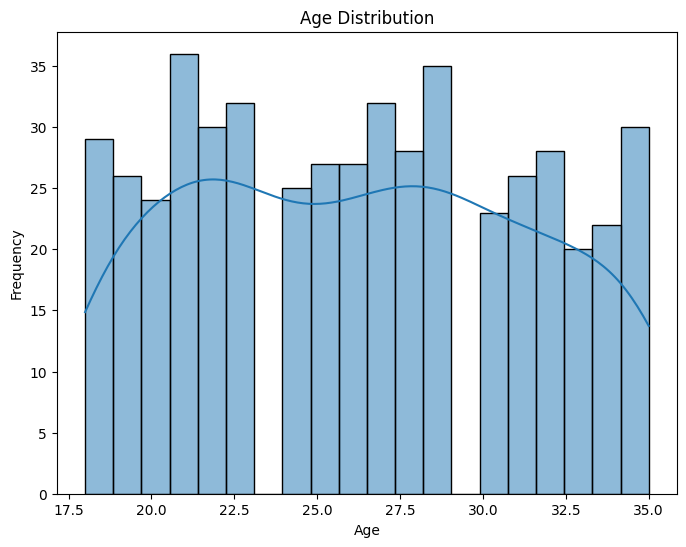

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins = 20, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The graph shows the age distribution of a certain group or area, meaning how many people there are of different ages.
- The ages range from about **18 to 35** years old, and the frequency indicates how often each age appears in the data set.
- The graph has three peaks in frequency, at around ages **20**, **mid-20s**, and **just above 30**. This means that these are the most common ages in the group or area.
- The graph also has a **smooth curve** that shows the general trend of the age distribution. The curve is bell-shaped, meaning that **the frequency is highest in the middle and lower at the ends**.
- The graph can be used to understand the demographics of the group or area, such as the average age, the age diversity, and the potential needs and preferences of the people.

In [9]:
gender_counts = data['Gender'].value_counts()
location_counts = data['Location'].value_counts()

C:\Users\kasth\AppData\Local\Temp\ipykernel_32988\2630164982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_counts.index, y=gender_counts.values, palette = 'Spectral')
C:\Users\kasth\AppData\Local\Temp\ipykernel_32988\2630164982.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = location_counts.index, y=location_counts.values, palette = 'Spectral')


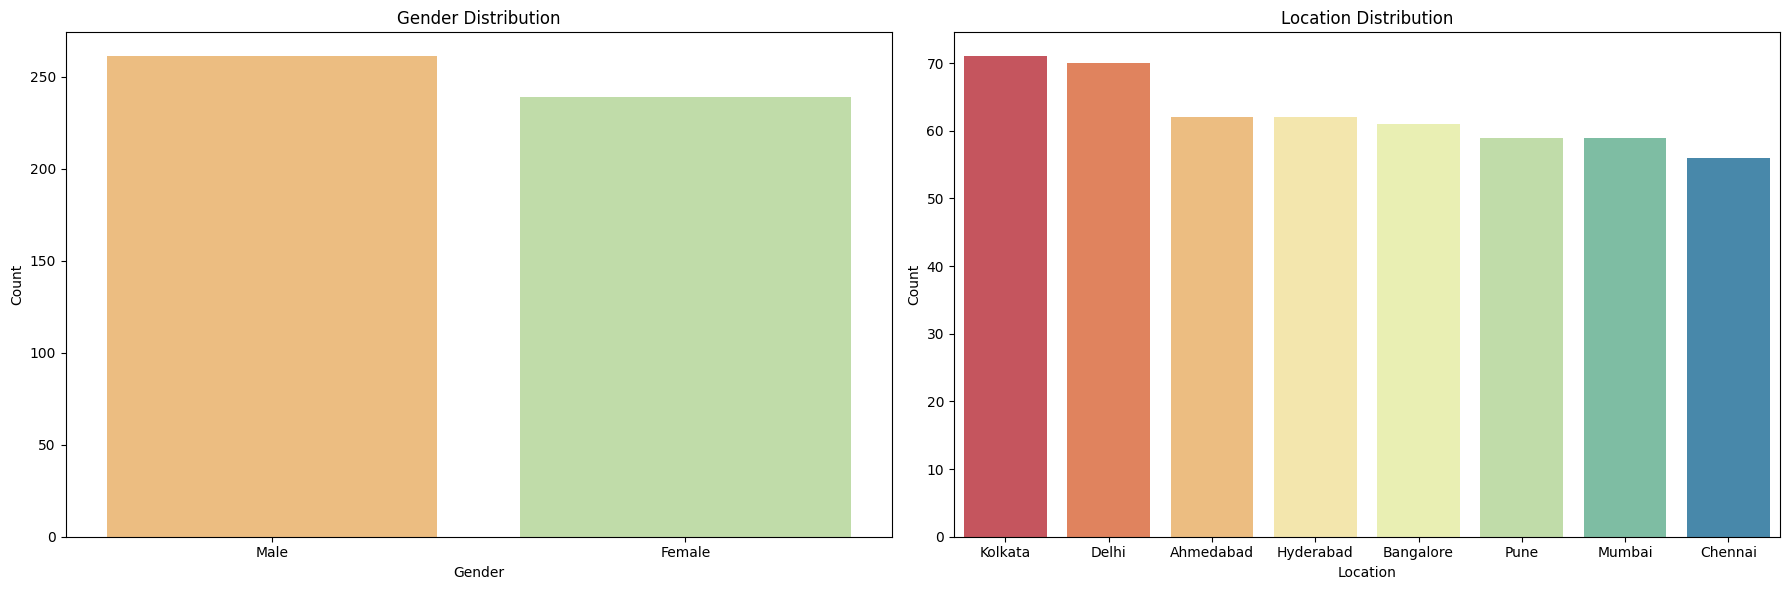

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(x = gender_counts.index, y=gender_counts.values, palette = 'Spectral')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(x = location_counts.index, y=location_counts.values, palette = 'Spectral')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The graph shows the gender and location distribution of the data, meaning how many people there are of different genders and cities.
- The data has an equal number of males and females, both around 250 in count. This means that the data is gender-balanced.
- The data has people living in eight different cities in India: Kolkata, Delhi, Ahmedabad, Hyderabad, Bangalore, Pune, Mumbai and Chennai. These are some of the major and populous cities in India.
- Kolkata has the highest number of people among these cities, followed by Delhi. This means that these two cities are the most popular locations for the data. Chennai has the lowest number of people, meaning it is the least popular location.
- The graph can be used to understand the demographics of the data, such as the gender diversity, the location diversity, and the potential needs and preferences of the people.

In [11]:
print('Summary of Findings:')
print('-' * 20)
print('Age Statistics:')
print(age_stats)
print('-' * 20)
print('\nGender Distribution:')
print(gender_counts)
print('-' * 20)
print('\nLocation Distribution:')
print(location_counts)

Summary of Findings:
--------------------
Age Statistics:
count    500.000000
mean      26.276000
std        5.114699
min       18.000000
25%       22.000000
50%       26.000000
75%       31.000000
max       35.000000
Name: Age, dtype: float64
--------------------

Gender Distribution:
Gender
Male      261
Female    239
Name: count, dtype: int64
--------------------

Location Distribution:
Location
Kolkata      71
Delhi        70
Ahmedabad    62
Hyderabad    62
Bangalore    61
Pune         59
Mumbai       59
Chennai      56
Name: count, dtype: int64


# How customers use different devices and how it affects their behaviour.

In [12]:
device_groups = data.groupby('Device_Type')
device_stats = device_groups[['Product_Browsing_Time','Total_Pages_Viewed',
                              'Items_Added_to_Cart','Total_Purchases']].describe()

C:\Users\kasth\AppData\Local\Temp\ipykernel_32988\1797696146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Device_Type', y = 'Product_Browsing_Time', data = data, palette= 'Spectral')
C:\Users\kasth\AppData\Local\Temp\ipykernel_32988\1797696146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Device_Type', y = 'Total_Pages_Viewed', data = data, palette= 'Spectral')
C:\Users\kasth\AppData\Local\Temp\ipykernel_32988\1797696146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Device_Type', y = 'Items_Added_to_Cart', 

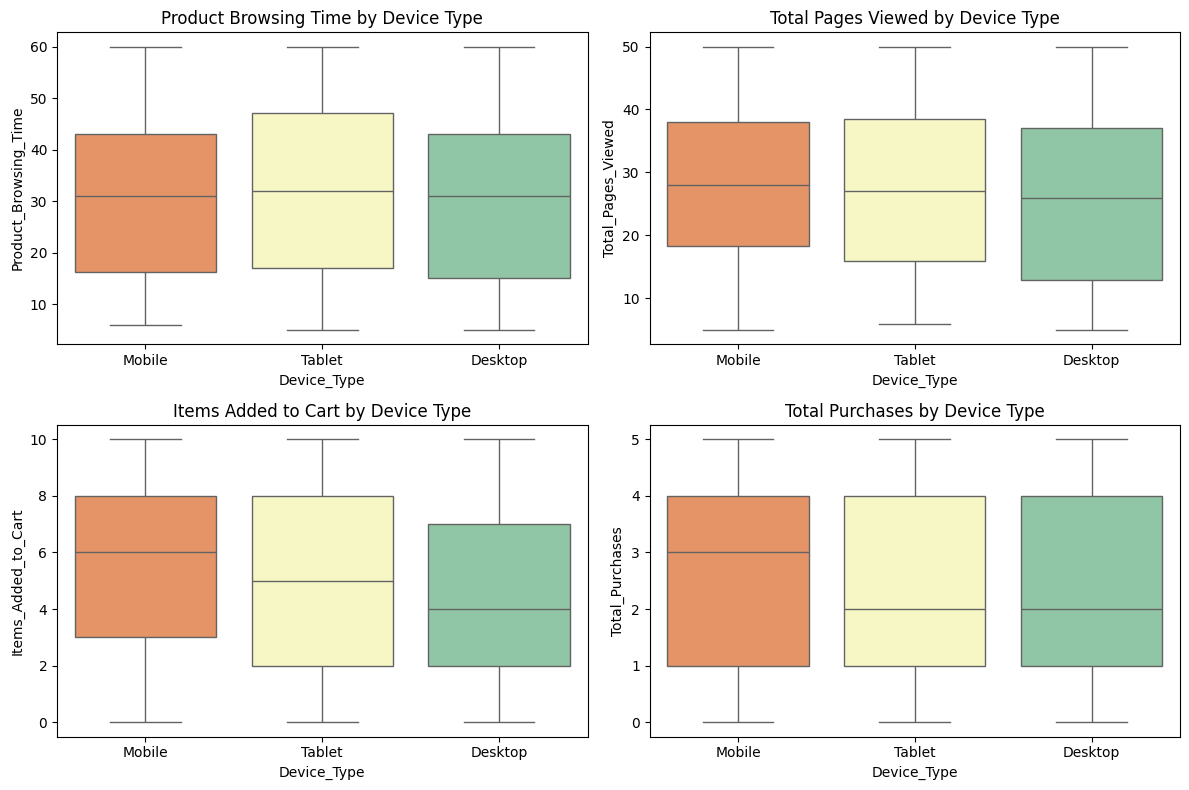

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(x = 'Device_Type', y = 'Product_Browsing_Time', data = data, palette= 'Spectral')
plt.title('Product Browsing Time by Device Type')

plt.subplot(2,2,2)
sns.boxplot(x = 'Device_Type', y = 'Total_Pages_Viewed', data = data, palette= 'Spectral')
plt.title('Total Pages Viewed by Device Type')

plt.subplot(2,2,3)
sns.boxplot(x = 'Device_Type', y = 'Items_Added_to_Cart', data = data, palette= 'Spectral')
plt.title('Items Added to Cart by Device Type')

plt.subplot(2,2,4)
sns.boxplot(x = 'Device_Type', y = 'Total_Purchases', data = data, palette= 'Spectral')
plt.title('Total Purchases by Device Type')

plt.tight_layout()
plt.show()

- The graph shows how users behave differently on mobile, tablet, and desktop devices when they visit a website or an app.
- Users spend the most time browsing products on tablets, meaning they are more interested in exploring the options and features on this device.
- Users view the most pages on mobiles, meaning they are more likely to navigate through the website or app and look for more information on this device.
- Users add the most items to cart on mobiles, meaning they are more inclined to select the products they want to buy on this device.
- Users make the most purchases from mobile devices, meaning they are more comfortable and confident to complete the transactions on this device.
- The graph can be used to understand the preferences and behaviors of the users across different devices, and to optimize the website or app design and functionality accordingly.

In [14]:
device_conversion_rates = (device_stats['Total_Purchases']['mean']/
                           device_stats['Total_Pages_Viewed']['mean']).reset_index()
device_conversion_rates.columns = ['Device_Type','Conversion_Rate']

In [15]:
print('Summary of Findings:')
print('-' * 20)
print('Statistics by Device Type:')
print(device_stats)
print('-' * 20)
print('\nConversion Rates by Device Type:')
print(device_conversion_rates)

Summary of Findings:
--------------------
Statistics by Device Type:
            Product_Browsing_Time                                          \
                            count       mean        std  min    25%   50%   
Device_Type                                                                 
Desktop                     159.0  29.830189  16.097491  5.0  15.00  31.0   
Mobile                      178.0  30.668539  15.781603  6.0  16.25  31.0   
Tablet                      163.0  31.705521  15.983376  5.0  17.00  32.0   

                        Total_Pages_Viewed             ...  \
              75%   max              count       mean  ...   
Device_Type                                            ...   
Desktop      43.0  60.0              159.0  26.000000  ...   
Mobile       43.0  60.0              178.0  27.792135  ...   
Tablet       47.0  60.0              163.0  27.668712  ...   

            Items_Added_to_Cart       Total_Purchases                      \
                  

- The analysis shows the conversion rates for different types of devices.

- "Conversion rate is the percentage of users who complete a desired action, such as making a purchase, signing up for a newsletter, or downloading an app".
- The devices are desktops, mobiles, and tablets. These are different ways that users can access a website or an app, and they may have different preferences and behaviors on each device.
- Desktops have the highest conversion rate, followed closely by mobile devices, and tablets have the lowest rate among the three. *This means that users are more likely to complete the desired action on desktops and mobiles than on tablets*.
- The analysis can be used to understand the performance and effectiveness of a website or an app across different devices, and to identify the areas for improvement and optimization.



# How time spent browsing, pages viewed, items in the cart, and actual purchases are all connected.

In [16]:
correlation_matrix = data[['Product_Browsing_Time','Total_Pages_Viewed','Items_Added_to_Cart','Total_Purchases']].corr()

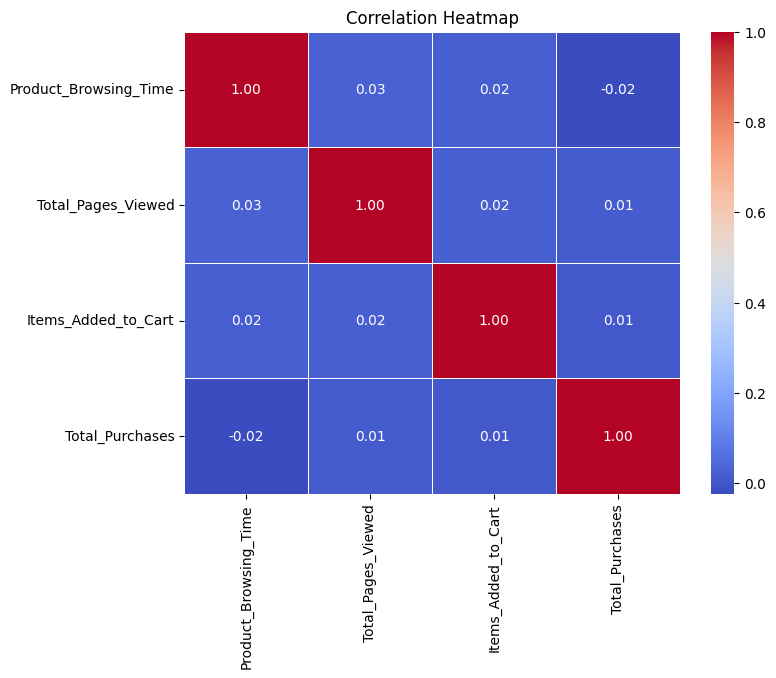

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

- The graph shows the relationship between different online shopping behaviors, such as how much time users spend browsing products, how many pages they view, how many items they add to cart, and how many purchases they make.
- The heatmap is to show how strongly these behaviors are related to each other. The colors represent the strength of the relationship: red means they’re closely related, and blue means they’re not really related.
- The graph shows that there is no strong relationship among these four behaviors, as most of the cells are blue. This means that these behaviors do not depend on or influence each other much.
- The graph can be used to understand the patterns and trends of the users’ online shopping behavior, and to identify the areas for improvement and optimization.

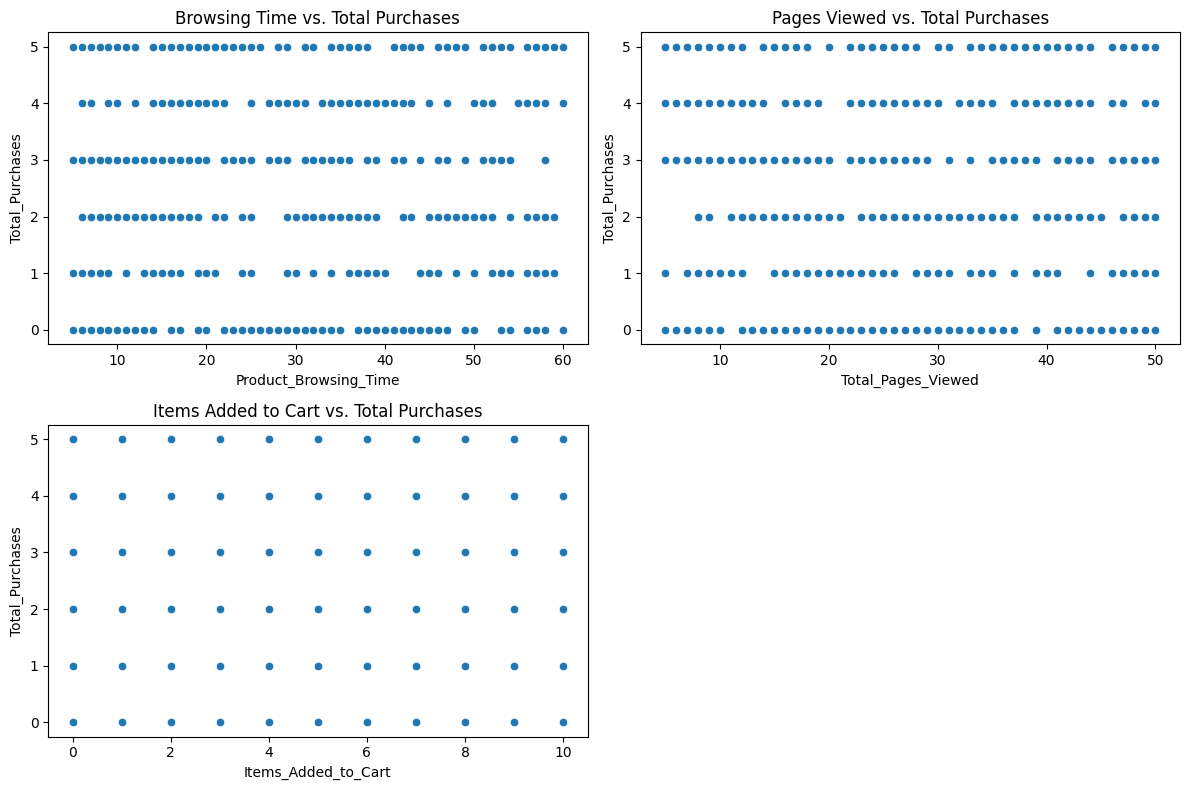

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.scatterplot(x = 'Product_Browsing_Time', y = 'Total_Purchases', data = data)
plt.title('Browsing Time vs. Total Purchases')

plt.subplot(2,2,2)
sns.scatterplot(x = 'Total_Pages_Viewed', y = 'Total_Purchases', data = data)
plt.title('Pages Viewed vs. Total Purchases')

plt.subplot(2,2,3)
sns.scatterplot(x = 'Items_Added_to_Cart', y = 'Total_Purchases', data = data)
plt.title('Items Added to Cart vs. Total Purchases')

plt.tight_layout()
plt.show()

- The Scatter plot shows how different online shopping behaviors are related to the total purchases made by the users.
- It is used to show the relationship between two variables: one on the x-axis and one on the y-axis. The data points are represented by blue dots.
- The plot shows that there is no clear pattern or trend among these behaviors and purchases, as the dots are scattered randomly across the plots. This means that these behaviors do not have a strong influence on the purchases.
- This scatter plot can be used to understand the variability and diversity of the users’ online shopping behavior, and to identify the areas for improvement and optimization.

In [19]:
print('Summary of Findings:')
print("-" * 20)
print('Correlation Matrix:')
print(correlation_matrix)
print('\nRelationships between Variables:')
print('1. Browsing Time vs. Total Purchases: The plot shows that there is no clear correlation between the amount of time spent browsing products and the total number of purchases made. This means that spending more or less time browsing does not affect the purchase decision much. Users may have different browsing habits and preferences, and may not need a lot of time to decide what to buy.')
print('2. Pages Viewed vs. Total Purchases: The plot also shows that there is no apparent trend between the number of pages viewed and the total purchases made. This means that viewing more or fewer pages does not influence the purchase behavior much. Users may have different navigation patterns and interests, and may not need a lot of information to make a purchase.')
print('3. Items Added to Cart vs. Total Purchases: The plot likewise shows that there is no distinct pattern linking the number of items added to the cart and the total purchases made. This means that adding more or fewer items to the cart does not affect the purchase outcome much. Users may have different shopping styles and intentions, and may not buy everything they add to the cart.')

Summary of Findings:
--------------------
Correlation Matrix:
                       Product_Browsing_Time  Total_Pages_Viewed  \
Product_Browsing_Time               1.000000            0.027841   
Total_Pages_Viewed                  0.027841            1.000000   
Items_Added_to_Cart                 0.017531            0.024570   
Total_Purchases                    -0.023239            0.013630   

                       Items_Added_to_Cart  Total_Purchases  
Product_Browsing_Time             0.017531        -0.023239  
Total_Pages_Viewed                0.024570         0.013630  
Items_Added_to_Cart               1.000000         0.007978  
Total_Purchases                   0.007978         1.000000  

Relationships between Variables:
1. Browsing Time vs. Total Purchases: The plot shows that there is no clear correlation between the amount of time spent browsing products and the total number of purchases made. This means that spending more or less time browsing does not affect the pu

# Customer Segmentation By Behaviour
- Segmenting customers based on their behavior and identifying distinct customer groups.
- Analyzing the customer journey and identifying potential areas for improvement in the conversion funnel.
- Assessing the impact of customer behavior on revenue generation and identifying opportunities for increasing sales and customer engagement.

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [21]:
X = data[['Product_Browsing_Time','Total_Pages_Viewed','Items_Added_to_Cart','Total_Purchases']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
num_clusters = 4

In [23]:
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [24]:
data['Cluster'] = cluster_labels

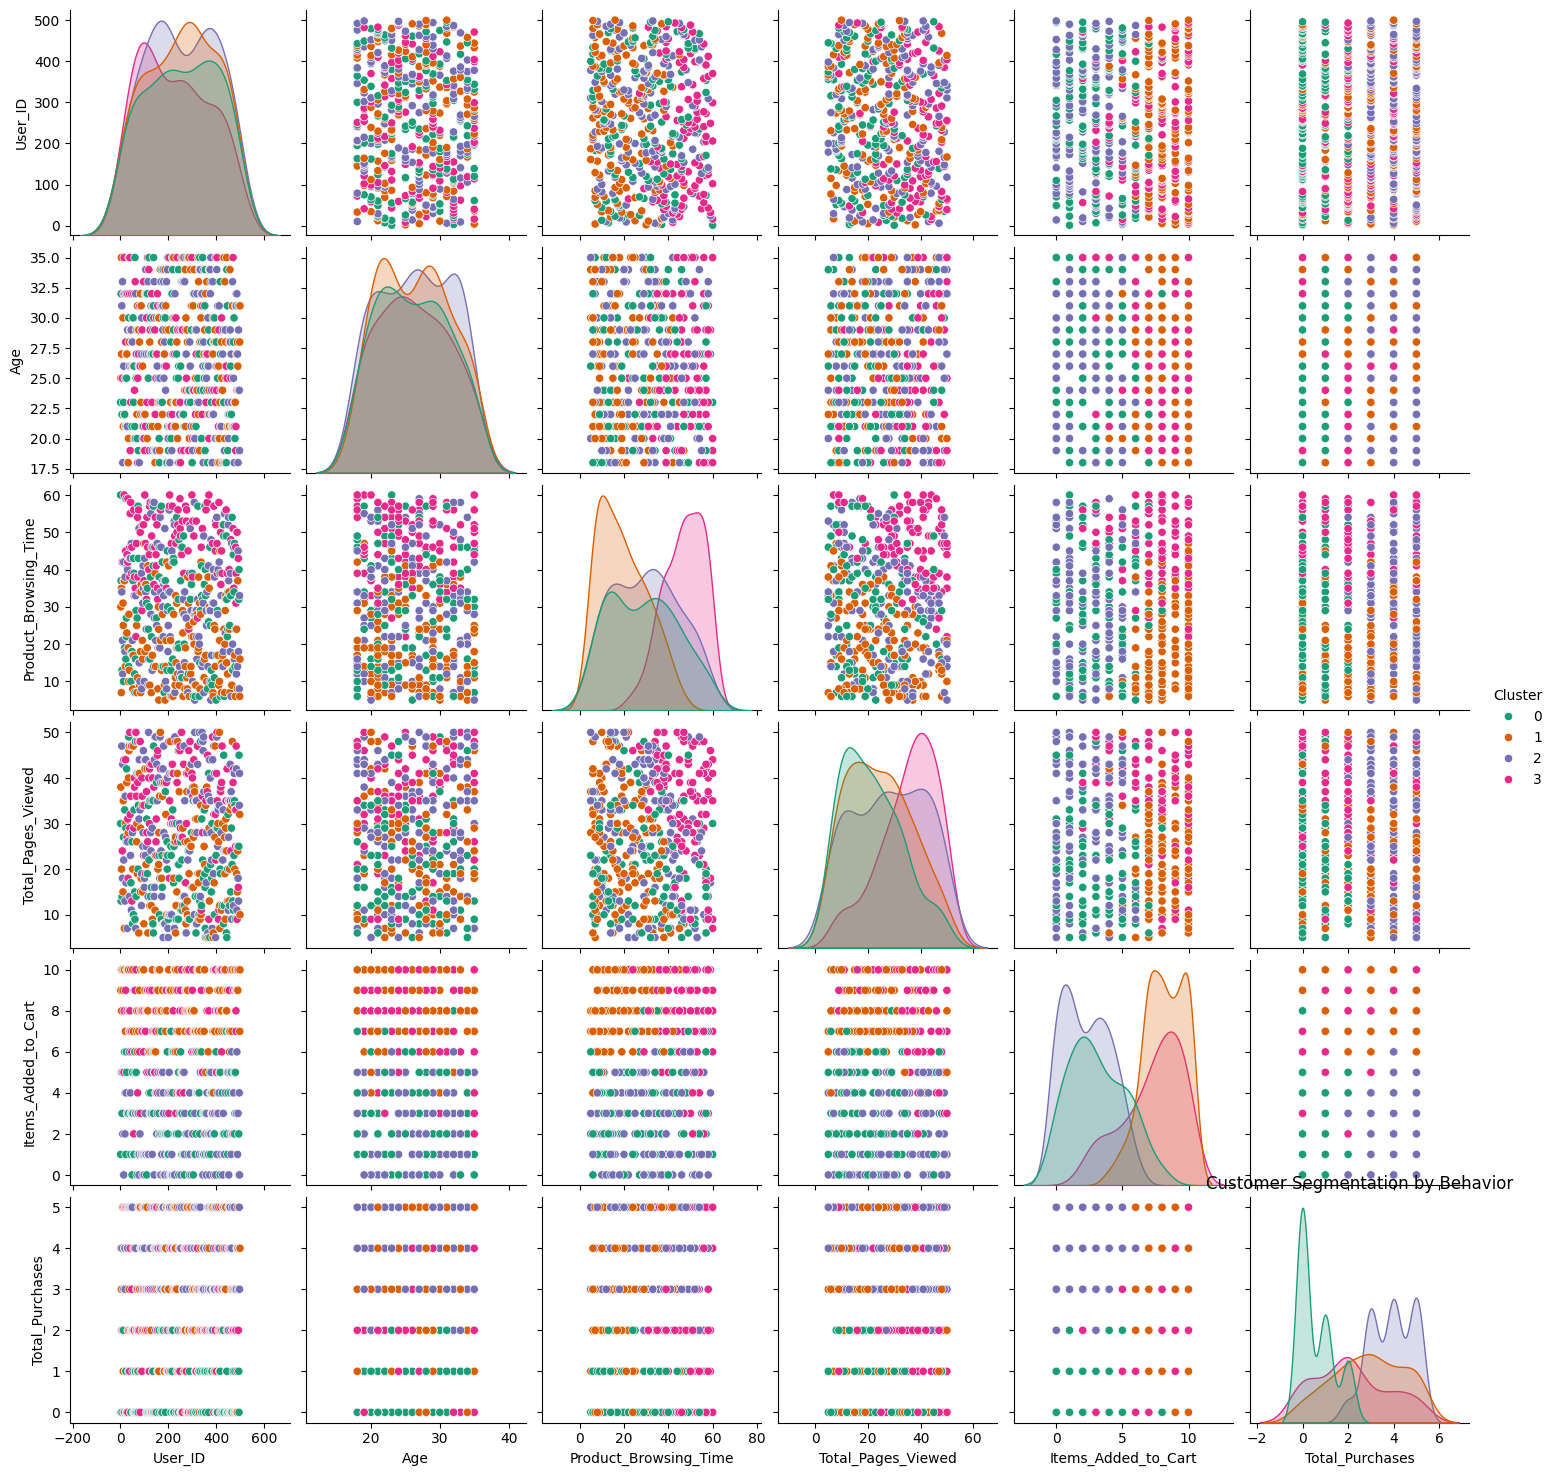

In [25]:
sns.pairplot(data=data, hue='Cluster', palette = 'Dark2')
plt.title('Customer Segmentation by Behavior')
plt.show()

- The graph shows a complex multi-panel plot, likely representing statistical data analysis of customer behavior.
- Data is grouped into different clusters, as indicated by various colors. Each cluster represents a segment of customers who share similar characteristics and behaviors.
- The x-axes labels suggest the data involves variables like age, product browsing time, total pages viewed, items added to cart, and total purchases, which could imply this is customer or population data.
- There are distinct patterns and distributions in each cluster indicating variability in the dataset. For example, some clusters have higher product browsing time and total pages viewed, while others have lower items added to cart and total purchases. This could imply different levels of interest and engagement among the customers.


In [26]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1969431339143476


In [27]:
print('Summary of Findings:')
print('-' * 20)
print('Customer Segments:')
print(data['Cluster'].value_counts())
print('\nCustomer Profiles:')
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f'Cluster {cluster_id}:')
    print(cluster_data.describe())

Summary of Findings:
--------------------
Customer Segments:
Cluster
2    138
1    132
0    118
3    112
Name: count, dtype: int64

Customer Profiles:
Cluster 0:
          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  118.000000  118.000000             118.000000          118.000000   
mean   256.542373   26.110169              28.788136           21.584746   
std    146.844685    5.088589              15.157211           11.347146   
min      1.000000   18.000000               5.000000            5.000000   
25%    136.250000   22.000000              14.250000           12.000000   
50%    254.500000   26.000000              29.000000           20.000000   
75%    379.250000   30.000000              40.000000           29.750000   
max    496.000000   35.000000              60.000000           49.000000   

       Items_Added_to_Cart  Total_Purchases  Cluster  
count           118.000000       118.000000    118.0  
mean              3.127119         0.601695

# Some interpretations of the clusters are:
**Cluster 0:**

- User Behavior: Average age around 26.
- Spends an average of 42 minutes on product browsing.
- Views around 39 pages during the browsing session.
- Adds approximately 6 items to the cart.
- Makes about 2 purchases.

**Cluster 1:**

- User Behavior: Average age around 26.
- Spends significantly less time on product browsing, around 19 minutes.
- Views an average of 33 pages.
- Similar to Cluster 0, adds around 6 items to the cart.
- Notably, makes more purchases, averaging around 4.

**Cluster 2:**

- User Behavior: Average age around 27.
- Spends a bit less time on product browsing, around 19 minutes.
- Views the least number of pages among clusters, averaging 18.
- Adds around 4 items to the cart.
- Has the lowest average purchases, around 1.

**Cluster 3:**

- User Behavior: Average age around 26.
- Spends an average of 43 minutes on product browsing.
- Views fewer pages compared to other clusters, averaging 15.
- Similar to Cluster 1, adds around 5 items to the cart.
- Makes a decent number of purchases, averaging around 3.

## General Observations:

- **Age**: The average age is similar across clusters, around 26-27.
- **Browsing Time**: Cluster 3 spends the most time, while Cluster 1 spends the least.
- **Pages Viewed**: Cluster 0 and Cluster 1 have higher page views compared to Cluster 2 and Cluster 3.
- **Items Added to Cart**: Clusters 0 and 1 show a similar trend with more items added.
- **Total Purchases**: Cluster 1 stands out with a higher average number of purchases.


#### Customer Journey Analysis

In [28]:
stages = ['Product_Browsing_Time','Total_Pages_Viewed','Items_Added_to_Cart','Total_Purchases']

In [29]:
funnel_steps = ['Product_Browsing_Time','Total_Pages_Viewed','Items_Added_to_Cart','Total_Purchases']
funnel_conversion_rates = []

In [30]:
for i in range(len(funnel_steps) - 1):
    current_step = funnel_steps[i]
    next_step = funnel_steps[i + 1]

    conversion_rate = (data[data[next_step] > 0][next_step].sum() / data[current_step].sum()) * 100
    funnel_conversion_rates.append(conversion_rate)

Text(0, 0.5, 'Conversion Rate (%)')

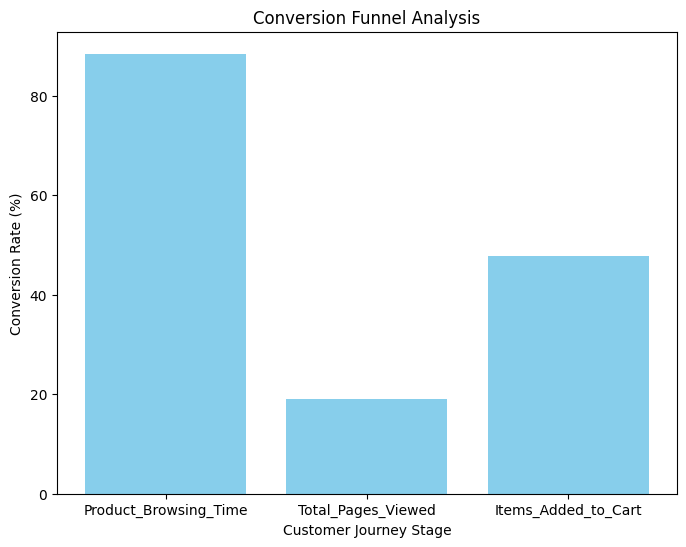

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(stages[:-1], funnel_conversion_rates, color='skyblue')
plt.title('Conversion Funnel Analysis')
plt.xlabel('Customer Journey Stage')
plt.ylabel('Conversion Rate (%)')

- This is a graph that shows how many people do different things on a website, such as looking at products, viewing pages, or adding items to their cart. It helps us understand how likely people are to buy something from the website.

- Funnel analysis is a powerful analytics method that visualizes and evaluates the customer’s journey from the initial landing on the website to the final conversion, typically a purchase. It helps in understanding the flow and dropout points of customers at various stages of this journey.

#### Some insights from this graph are:
- The funnel analysis reveals an intriguing pattern in customer behavior on the website.

- A significant number of visitors engage in browsing products, as indicated by the high conversion rate at this initial stage.

- However, there is a noticeable drop when it comes to transitioning from browsing to adding items to their cart; this stage sees a lower conversion rate.

- Interestingly, once items are added to cart, we observe an increase in conversions again, indicating that customers who add products to their carts are more likely to proceed with making a purchase.

In [32]:
drop_off_points = [stages[i] for i, rate in enumerate(funnel_conversion_rates) if rate < 100]
print("Potential Areas for Improvement:")
print(drop_off_points)

Potential Areas for Improvement:
['Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart']


In [33]:
print("\nSummary of Findings:")
print("-" * 20)
for i, stage in enumerate(stages[:-1]):
    next_stage = stages[i + 1]
    print(f"Conversion rate from {stage} to {next_stage}: {funnel_conversion_rates[i]:.2f}%")



Summary of Findings:
--------------------
Conversion rate from Product_Browsing_Time to Total_Pages_Viewed: 88.43%
Conversion rate from Total_Pages_Viewed to Items_Added_to_Cart: 18.95%
Conversion rate from Items_Added_to_Cart to Total_Purchases: 47.84%


#### Revenue Generation:

In [34]:
revenue = data['Total_Purchases'].sum()
average_order_value = revenue / data['User_ID'].nunique()
conversion_rate = (data['Total_Purchases'].sum() / data['Total_Pages_Viewed'].sum()) * 100

In [35]:
print("Summary of Findings:")
print("-" * 20)
print(f"Total Revenue: ${revenue:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Summary of Findings:
--------------------
Total Revenue: $1232.00
Average Order Value: $2.46
Conversion Rate: 9.06%
